In [ ]:
import warnings
import argparse
import logging

# --------
import pandas as pd
import numpy as np

#----------
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

#--------- Importando mlflow
import mlflow
import mlflow.sklearn as mlsk

logging.basicConfig(
    level=logging.WARN
)
logger = logging.getLogger(__name__)

"""
e é uma biblioteca do Python que facilita a criação de interfaces de 
linha de comando (CLI) para seus scripts.  Ele permite que você defina 
quais argumentos (ou parâmetros) o script pode receber e os processa 
automaticamente para que você os utilize dentro do programa.
"""
parser = argparse.ArgumentParser()
parser.add_argument(
    "--alpha",
    type = float,
    required = False,
    default = 0.5
)
parser.add_argument(
    "--l1_ratio",
    type = float,
    required = False,
    default = 0.5
)
args = parser.parse_args()


# Metricas
def metricas(ytrue, ypred):
    rmse = root_mean_squared_error(ytrue, ypred)
    mae  = mean_absolute_error(ytrue, ypred)
    r2_  = r2_score(ytrue, ypred)

    return rmse, mae, r2_


if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    url = (
        "https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv"
    )

    try:
        data_ = pd.read_csv(url, sep=';')

    except Exception as e:
        logger.exception(
            "OBS: Algo deu de errado", 0
        )
    train, test = train_test_split(data_)

    xtrain, ytrain = (
        train.drop(columns=["quality"]),
        train["quality"]
    )

    xtest, ytest = (
        test.drop(columns=["quality"]),
        test["quality"]
    )

    alpha = args.alpha
    l1_ratio = args.l1_ratio
    
    # Definindo um nome do experimento
    exp = mlflow.set_experiment(experiment_name="ExperimentoRegreesaoElastica")

    with mlflow.start_run(experiment_id=exp.experiment_id):
        elastic = ElasticNet(
            alpha=alpha, l1_ratio=l1_ratio, random_state=32
        )
        elastic.fit(xtrain, ytrain)
    
        pred_ = elastic.predict(xtest)
    
        
        rmse, mae, r2 = metricas(ytest, pred_)
        
        print(elastic.get_params)
        print("RMSE :",rmse)
        print("MAE  :",mae)
        print("R2   :",r2)

        # Logando os paramatros do modelos
        mlflow.log_params(
            **dict(alpha=parser.alpha, l1_ratio=parser.l1_ratio)
        )

        # Logando metricas
        mlflow.log_metrics(
            **dict(
                root_mean_squared_error_ = rmse,
                mean_absolute_error_     = mae,
                r2_score_                = r2
            )
        )

        # Rastreando modelo treinado

        mlsk.load_model(
            elastic, "modelo_elasticNet"
        )

Um experimento pode ter um $n$ número de execuções, onde uma excução é um unica execução de um pedaço de código ou um módelo de aprendizado de máquina.
**Cada execução pode registrar versão do código, hiperparametros, trilhas de matriz, arterfator** isso tudo é armazenado no MLFlow.

Experiementos são agrupamentos lógicos de execuções. Que nos permitem organizar e analisar grupos de execuções.

Sempre quanto cria e exceta um experiemento ele recebe um id=próprio e um nome que pode ser utilizado para recuperar metadados

In [1]:
import matplotlib.pyplot as plt

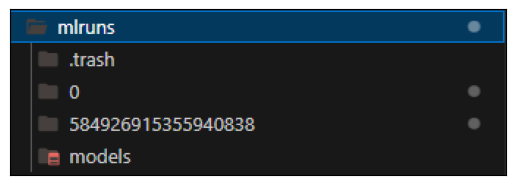

In [5]:
arr_ = plt.imread(fname="StructureFolder.png")
plt.imshow(arr_)
plt.xticks([])
plt.yticks([])
plt.show()

> **.trash**: Nele e onde é salvo os experiementos excluidos igual a lixeira do windows 
> **0**: esse é o experimento padrão caso não tenha definido o explicitamento o experimento em código
> **584...***: é onde contém nosso experimento

```yml meta.yml
artifact_location: file:///C:/Users/mateu/Documents/MEGA/Projetos-git/MLFlow-Curso-Udemy/mlruns/584926915355940838
creation_time: 1732896391429
experiment_id: '584926915355940838'
last_update_time: 1732896391429
lifecycle_stage: active
name: ExperimentoRegreesaoElastica
```
> Nele é quardado nome do experimento junto com o id dele